In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import diabetes dataset from path
diabetes = pd.read_csv('/Users/sayanasabu/Downloads/diabetes.csv')

In [3]:
# print head
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# import train_test_split
from sklearn.model_selection import train_test_split
# set X equal to all of the feature values
X = diabetes.to_numpy()
# remove 'Outcome' column from variable X
X = np.delete(X, 8, 1)
# set y equal to the value of the 'Outcome' column
y = diabetes['Outcome'].to_numpy()
# create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# normalize the features
from sklearn import preprocessing, model_selection

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Decision Tree
# Decision Tree using scikit-learn
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier(random_state=2)
# fit model based on training data
dec_tree = dec_tree.fit(X_train, y_train)
# y_hat = our predictions based on X_test on the model learned from training data
y_hat = dec_tree.predict(X_test)

In [7]:
# print metrics
from sklearn import metrics
print('Criterion = Gini | Max Depth = None | Accuracy score:', metrics.accuracy_score(y_test, y_hat))

Criterion = Gini | Max Depth = None | Accuracy score: 0.7792207792207793


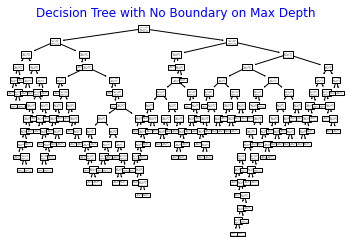

In [8]:
# print tree
tree.plot_tree(dec_tree)
plt.title('Decision Tree with No Boundary on Max Depth', color='b')
plt.show()

In [9]:
dec_tree2 = tree.DecisionTreeClassifier(random_state=2, max_depth=7)
# fit model based on training data
dec_tree2 = dec_tree2.fit(X_train, y_train)
# y_hat = our predictions based on X_test on the model learned from training data
y_hat = dec_tree2.predict(X_test)

# print metrics
from sklearn import metrics
print('Criterion = Gini | Max Depth = 7 | Accuracy score:', metrics.accuracy_score(y_test, y_hat))

Criterion = Gini | Max Depth = 7 | Accuracy score: 0.7922077922077922


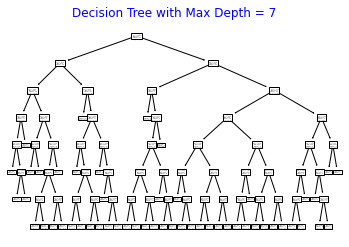

In [10]:
# print tree
tree.plot_tree(dec_tree2)
plt.title('Decision Tree with Max Depth = 7', color='b')
plt.show()

In [11]:
dec_tree3 = tree.DecisionTreeClassifier(criterion='entropy', random_state=2)
# fit model based on training data
dec_tree3 = dec_tree3.fit(X_train, y_train)
# y_hat = our predictions based on X_test on the model learned from training data
y_hat = dec_tree3.predict(X_test)

# print metrics
from sklearn import metrics
print('Criterion = Entropy | Max Depth = None | Accuracy score:', metrics.accuracy_score(y_test, y_hat))

Criterion = Entropy | Max Depth = None | Accuracy score: 0.7337662337662337


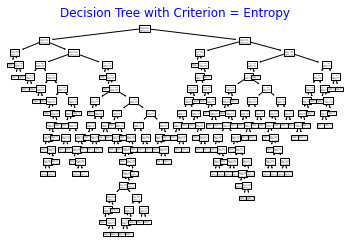

In [12]:
# print tree
tree.plot_tree(dec_tree3)
plt.title('Decision Tree with Criterion = Entropy', color='b')
plt.show()

In [13]:
dec_tree4 = tree.DecisionTreeClassifier(criterion='entropy', random_state=2, max_depth=7)
# fit model based on training data
dec_tree4 = dec_tree4.fit(X_train, y_train)
# y_hat = our predictions based on X_test on the model learned from training data
y_hat = dec_tree4.predict(X_test)

# print metrics
from sklearn import metrics
print('Criterion = Entropy | Max Depth = 7 | Accuracy score:', metrics.accuracy_score(y_test, y_hat))

Criterion = Entropy | Max Depth = 7 | Accuracy score: 0.6818181818181818


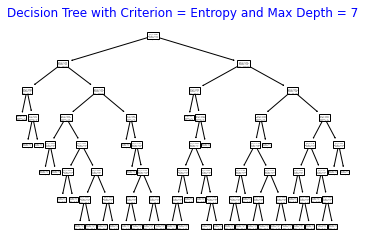

In [14]:
# print tree
tree.plot_tree(dec_tree4)
plt.title('Decision Tree with Criterion = Entropy and Max Depth = 7', color='b')
plt.show()

# Observations
DecisionTreeClassifier performed better when the splitting criterion = 'gini'. This is because the Gini Index is based on the randomness of a misclassification of a datapoint, while Entropy is based on trying to attain the maximum Information Gain. For this particular dataset, the classifier performerd better when finding the probability for a random instance being misclassified, as opposed to when trying to split on the maximum IG (despite controlling the depth of the tree). This also tells us that there is a lot of variability in the feature variables. 